In [43]:
import datetime
import numpy as np
import pandas as pd
%matplotlib inline

import pandas_datareader.data as web
import fix_yahoo_finance as yf
import math
import matplotlib.pyplot as plt

In [35]:
stocks = ['AAPL']
#          ,'GS','JPM','C']
start = datetime.datetime(2013,1,1)
end = datetime.datetime(2018,9,24)
df = yf.download(stocks,start = start,end = end)
type(df['Adj Close'].values)

[*********************100%***********************]  1 of 1 downloaded


numpy.ndarray

In [54]:
# prices is the column(nparray) of the closing price of a certain stock
# it returns a numpy array
def rsiFunc(df, n=14):
    prices = df['Adj Close'].values
    deltas = np.diff(prices)
    seed = deltas[:n+1]
    up = seed[seed>=0].sum()/n
    down = -seed[seed<0].sum()/n
    rs = up/down
    rsi = np.zeros_like(prices)
    rsi[:n] = 100. - 100./(1.+rs)

    for i in range(n, len(prices)):
        delta = deltas[i-1] # cause the diff is 1 shorter

        if delta>0:
            upval = delta
            downval = 0.
        else:
            upval = 0.
            downval = -delta

        up = (up*(n-1) + upval)/n
        down = (down*(n-1) + downval)/n

        rs = up/down
        rsi[i] = 100. - 100./(1.+rs)
    
    df['RSI'] = rsi
    df['Normal Return'] = df['Adj Close'].pct_change()
    #df[str(n) + ' SMA'] = df['Adj Close'].rolling(n).mean()
    df['Signal'] = np.where(df['RSI'] > 70,1,np.where(df['RSI'] < 30, -1, 0))
    df['Log Return'] = df['Normal Return'].apply(lambda x:math.log(x+1))
    df['Strat Daily Return'] = np.where(df['Signal'] == 1, df['Log Return'], np.where(df['Signal'] == -1,-df['Log Return'], 0))
    df['Cumulative Sum'] = df['Strat Daily Return'].cumsum()
    plt.plot(df.reset_index()['Date'],df['RSI'], label = 'RSI')
    plt.plot(df.reset_index()['Date'],np.array([30 for i in range(len(df['RSI']))]), label = '30')
    plt.plot(df.reset_index()['Date'],np.array([70 for i in range(len(df['RSI']))]), label = '70')
    plt.title('RSI')
    plt.legend()
    plt.show()
    
    return df,df['Cumulative Sum'][-1]

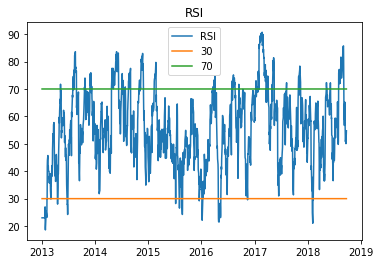

2.331221587758704

In [55]:
new_df,cs = rsiFunc(df, n=14)
new_df
cs

In [36]:
len(np.array(df['MS']))

1444

In [37]:
np.array(df['MS'])

array([19.62000084, 19.57999992, 20.19000053, ..., 49.40999985,
       48.56000137, 48.27999878])

In [39]:
rsi = rsiFunc(np.array(df['MS']))
rsi

array([77.09090493, 77.09090493, 77.09090493, ..., 56.16743832,
       49.09507669, 46.99581018])

In [41]:
len(rsi) # len(ris)= len (original array)

1444

In [40]:
rsi[-1] # the last number

46.99581018454143